## Multivariate Time series Analysis and Forecasting 

In [1]:
###packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# import plotly.plotly as py
# import plotly.graph_objs as go
# # Offline mode
# from plotly.offline import init_notebook_mode, iplot
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR


In [2]:
airqualitydata=pd.read_excel('AirQualityUCI.xlsx',parse_dates=[['Date','Time']]) ## combined date and time
airqualitydata.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
airqualitydata.columns

Index(['Date_Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [4]:
airqualitydata.shape

(9357, 14)

In [5]:
airqualitydata.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [6]:
airqualitydata.dtypes

Date_Time        datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

#### Data preprocessing

In [7]:
airqualitydata.isna().sum()

Date_Time        0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [8]:
airqualitydata.duplicated().sum()

0

In [9]:
Year=airqualitydata.Date_Time.dt.year
unique_yr=list(set(Year))
print(unique_yr)
len(unique_yr)

[2004, 2005]


2

In [10]:
airqualitydata.groupby(Year)['T'].mean()

Date_Time
2004    13.777685
2005    -2.883712
Name: T, dtype: float64

In [11]:
airqualitydata.groupby(Year)['CO(GT)'].mean()

Date_Time
2004   -42.854416
2005    -6.846862
Name: CO(GT), dtype: float64

In [18]:
# df=pd.DataFrame()
# df['Date_time']=airqualitydata.Date_Time
# # df['Category_time']

In [21]:
# type(entry)

int

In [39]:
# [entry[0:2] for entry in airqualitydata['Date_Time'].dt.time] error
# for entry in airqualitydata['Date_Time'].dt.hour:
#     print(f'Old entry:{entry}')
#     if entry in (23,0,1,2,3):        
# #         print(f'New entry:{entry}')
#         print(f'Category assigned for {entry}: Midnight')
#         df['Category']='Midnight'
#     if entry >=4 and entry<=11:        
# #         print(f'New entry:{entry}')
#         print(f'Category assigned for {entry}: Morning')
#         df['Category']='Morning'
#     if entry >=12 and entry<=15:        
# #         print(f'New entry:{entry}')
#         print(f'Category assigned for {entry}: Afternoon')
#         df['Category']='Afternoon'
#     if entry >=16 and entry<=18:        
# #         print(f'New entry:{entry}')
#         print(f'Category assigned for {entry}: Eve')
#         df['Category']='Evening'
#     if entry >=19 and entry<=22:        
# #         print(f'New entry:{entry}')
#         print(f'Category assigned for {entry}: night')
#         df['Category']='Night'

Old entry:18
Category assigned for 18: Eve
Old entry:19
Category assigned for 19: night
Old entry:20
Category assigned for 20: night
Old entry:21
Category assigned for 21: night
Old entry:22
Category assigned for 22: night
Old entry:23
Category assigned for 23: Midnight
Old entry:0
Category assigned for 0: Midnight
Old entry:1
Category assigned for 1: Midnight
Old entry:2
Category assigned for 2: Midnight
Old entry:3
Category assigned for 3: Midnight
Old entry:4
Category assigned for 4: Morning
Old entry:5
Category assigned for 5: Morning
Old entry:6
Category assigned for 6: Morning
Old entry:7
Category assigned for 7: Morning
Old entry:8
Category assigned for 8: Morning
Old entry:9
Category assigned for 9: Morning
Old entry:10
Category assigned for 10: Morning
Old entry:11
Category assigned for 11: Morning
Old entry:12
Category assigned for 12: Afternoon
Old entry:13
Category assigned for 13: Afternoon
Old entry:14
Category assigned for 14: Afternoon
Old entry:15
Category assigned for

In [65]:
# entry.between_time('0:15', '0:45')

AttributeError: 'int' object has no attribute 'between_time'

In [35]:
# datetime.time(14, 0)
# airqualitydata['Date_Time'].dt.hour[0]

18

In [53]:
# df.loc[(df['Date_time'].dt.hour >=12) & (df['Date_time'].dt.hour<=15), ['Category']]='Afternoon'
# df.loc[(df['Date_time'].dt.hour >=4) & (df['Date_time'].dt.hour<=11), ['Category']]='Morning'
# df.loc[(df['Date_time'].dt.hour >=16) & (df['Date_time'].dt.hour<=18), ['Category']]='Evening'
# df.loc[(df['Date_time'].dt.hour >=19) & (df['Date_time'].dt.hour<=22), ['Category']]='Night'


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [52]:
# df.loc[df['Date_time'].dt.hour in (23,0,1,2,3),['Category']]='Midnight'

,Date_time,Category
0,2004-03-10 18:00:00,Evening
1,2004-03-10 19:00:00,Night
2,2004-03-10 20:00:00,Night
3,2004-03-10 21:00:00,Night
4,2004-03-10 22:00:00,Night
5,2004-03-10 23:00:00,Afternoon
6,2004-03-11 00:00:00,Afternoon
7,2004-03-11 01:00:00,Afternoon
8,2004-03-11 02:00:00,Afternoon
9,2004-03-11 03:00:00,Afternoon


In [67]:
# datetime.time(14,0)

datetime.time(14, 0)

In [72]:
airqualitydata.set_index('Date_Time')

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.000000,150,11.881723,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.250000,112,9.397165,954.750000,103.0,1173.750000,92.0,1558.750000,972.250000,13.300000,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.000000,88,8.997817,939.250000,131.0,1140.000000,114.0,1554.500000,1074.000000,11.900000,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.500000,80,9.228796,948.250000,172.0,1092.000000,122.0,1583.750000,1203.250000,11.000000,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.250000,51,6.518224,835.500000,131.0,1205.000000,116.0,1490.000000,1110.000000,11.150000,59.575001,0.788794
2004-03-10 23:00:00,1.2,1197.000000,38,4.741012,750.250000,89.0,1336.500000,96.0,1393.000000,949.250000,11.175000,59.175000,0.784772
2004-03-11 00:00:00,1.2,1185.000000,31,3.624399,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000,56.775000,0.760312
2004-03-11 01:00:00,1.0,1136.250000,31,3.326677,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000,60.000000,0.770238
2004-03-11 02:00:00,0.9,1094.000000,24,2.339416,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000,59.674999,0.764819


In [75]:
airqualitydata.set_index('Date_Time',inplace=True)
airqualitydata.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [76]:
airqualitydata.between_time('18:00:00','20:00:00')

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.000000,150,11.881723,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.250000,112,9.397165,954.750000,103.0,1173.750000,92.0,1558.750000,972.250000,13.300000,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.000000,88,8.997817,939.250000,131.0,1140.000000,114.0,1554.500000,1074.000000,11.900000,53.975000,0.750239
2004-03-11 18:00:00,4.8,1580.750000,307,20.799217,1318.500000,281.0,798.500000,151.0,2083.000000,1408.500000,10.350000,64.174999,0.806544
2004-03-11 19:00:00,6.9,1775.500000,461,27.359807,1487.750000,383.0,702.250000,172.0,2332.500000,1704.000000,9.650000,69.300001,0.831921
2004-03-11 20:00:00,6.1,1640.000000,401,24.017757,1404.000000,351.0,742.750000,165.0,2191.250000,1653.750000,9.650000,67.750000,0.813314
2004-03-12 18:00:00,3.9,1509.500000,233,19.290975,1276.500000,206.0,812.250000,149.0,1909.750000,1409.500000,15.150000,39.550000,0.676627
2004-03-12 19:00:00,3.7,1525.250000,242,18.226178,1246.000000,202.0,821.000000,145.0,1846.750000,1447.750000,14.400000,43.425000,0.708450
2004-03-12 20:00:00,6.6,1843.000000,488,32.556278,1609.750000,340.0,624.000000,170.0,2390.250000,1886.500000,12.875000,50.525001,0.747803


In [77]:
airqualitydata.shape

(9357, 13)

In [81]:
airqualitydata.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

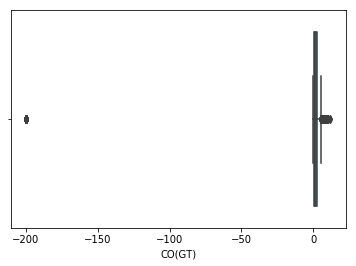

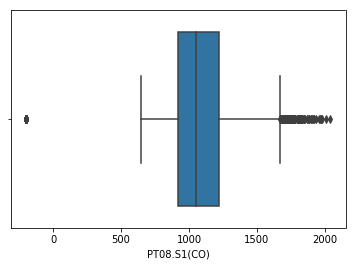

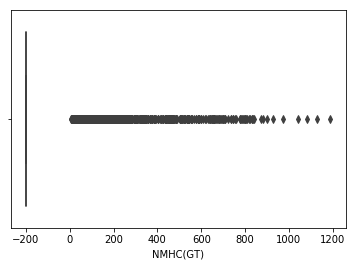

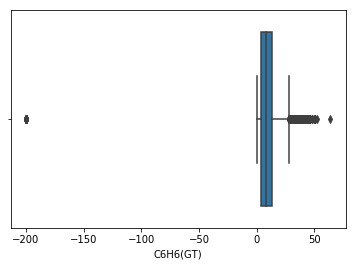

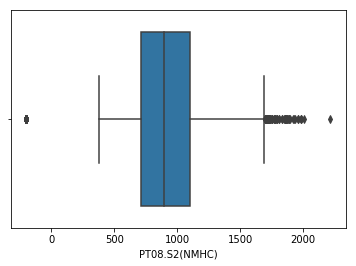

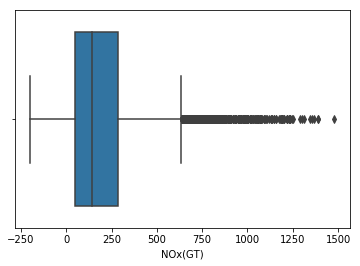

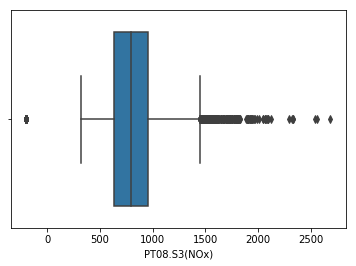

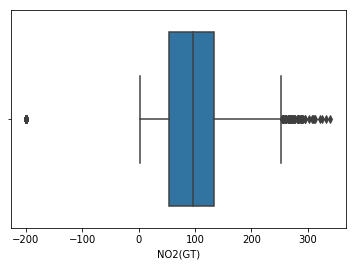

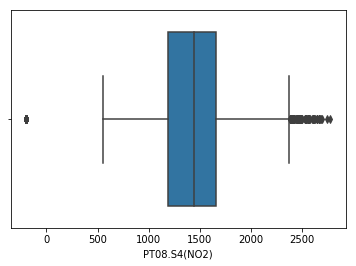

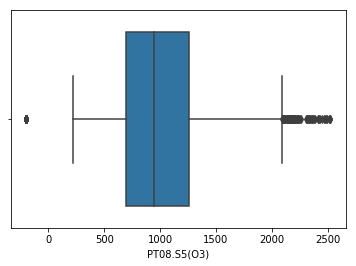

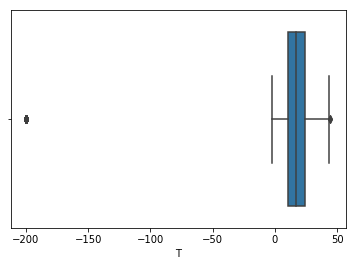

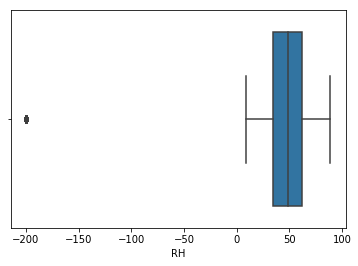

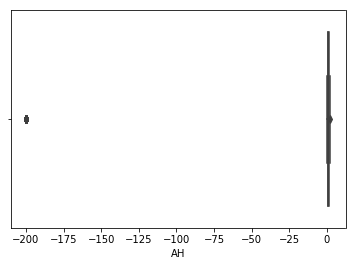

In [91]:
for col in airqualitydata.columns:
    sns.boxplot(airqualitydata[col])
    plt.show()

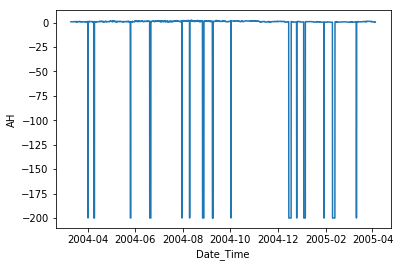

In [120]:
sns.lineplot(x=airqualitydata.index, y=airqualitydata['AH'])

### Time series analysis

#### Pre requisites : no white noise, stationarity

In [109]:
airqualitydata.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [113]:
## white noise - analyze every column
# plt.scatter(x=airqualitydata.index,y=airqualitydata['CO(GT)']) # not random
airqualitydata['CO(GT)'].mean() # non zero no whitenoise
airqualitydata.describe() ## every attribtes mean non zero so no white noise present

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [115]:
for col in airqualitydata.columns:
    print(f'Variance of {col} is: {airqualitydata[col].var()}')

Variance of CO(GT) is: 6030.636106276823
Variance of PT08.S1(CO) is: 108779.26309521518
Variance of NMHC(GT) is: 19540.99049290499
Variance of C6H6(GT) is: 1712.317143218122
Variance of PT08.S2(NMHC) is: 117180.17665318836
Variance of NOx(GT) is: 66267.40479317415
Variance of PT08.S3(NOx) is: 103669.20871905099
Variance of NO2(GT) is: 16111.58746171175
Variance of PT08.S4(NO2) is: 218268.72172917935
Variance of PT08.S5(O3) is: 208778.37916470043
Variance of T is: 1866.5370236018796
Variance of RH is: 2623.042272805839
Variance of AH is: 1519.1808166108053


#### Conclusion 1: No white noise

In [ ]:
###### stationarity - 

CO(GT)


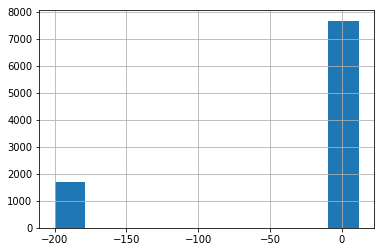

PT08.S1(CO)


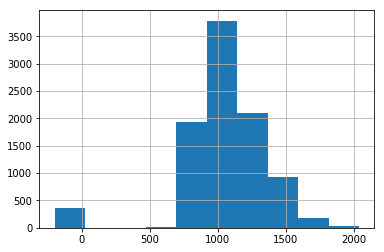

NMHC(GT)


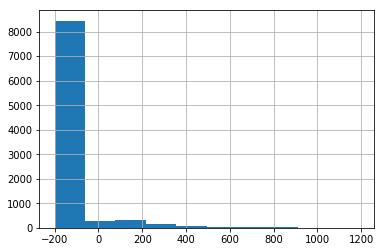

C6H6(GT)


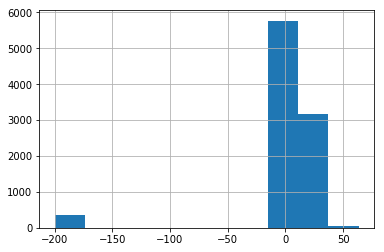

PT08.S2(NMHC)


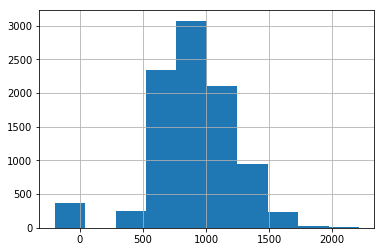

NOx(GT)


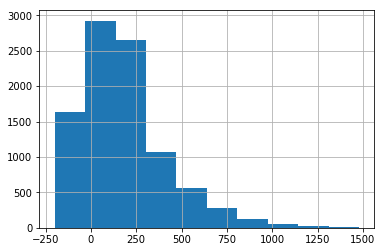

PT08.S3(NOx)


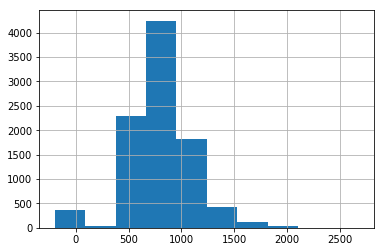

NO2(GT)


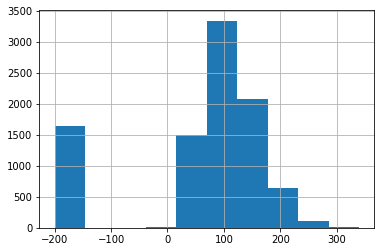

PT08.S4(NO2)


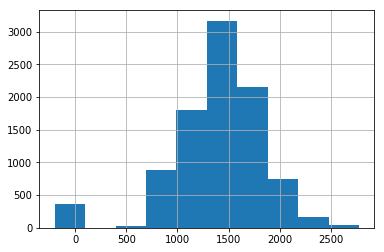

PT08.S5(O3)


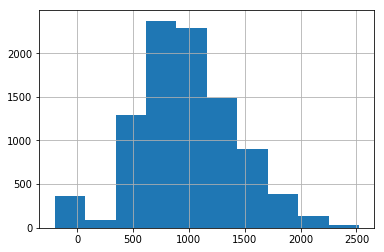

T


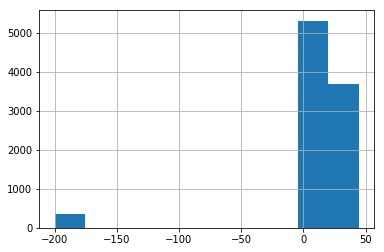

RH


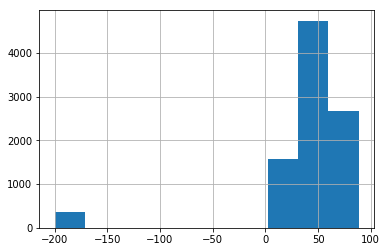

AH


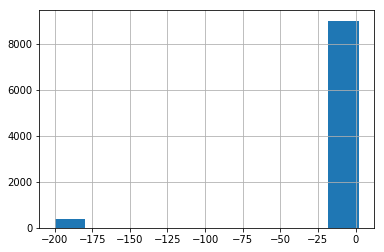

In [124]:
for col in airqualitydata.columns:
    print(col)
    airqualitydata[col].hist()
    plt.show()

#### Johansen's cointegration test 

##### eigen values<1 - stationary

In [146]:
leave_last=airqualitydata.loc[:,airqualitydata.columns[0:10]]

In [133]:
airqualitydata.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [147]:
coint_johansen(leave_last,-1,1).eig

array([0.13265795, 0.10808551, 0.09355879, 0.0668413 , 0.03490129,
       0.032524  , 0.02484932, 0.01854537, 0.0074119 , 0.00018049])

In [140]:
airqualitydata.columns[0:13]

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [158]:
for i in reversed(range(0,14)):
    print(i)
    print(airqualitydata.columns[0:i])
    subset=airqualitydata.loc[:,airqualitydata.columns[0:i]]
    print(coint_johansen(subset,-1,1).eig)
    i=i-1
    if(i==0):
        break

13
Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')
[1.85252308e-01 1.51908276e-01 1.06746736e-01 1.00046408e-01
 9.13034042e-02 6.60145291e-02 4.03541065e-02 3.42562255e-02
 2.73582787e-02 1.82528968e-02 1.49481368e-02 4.13566417e-03
 7.20704439e-05]
12
Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH'],
      dtype='object')
[1.78440928e-01 1.15513865e-01 1.04922688e-01 9.46514605e-02
 6.77753174e-02 4.72966078e-02 3.49836154e-02 3.18893877e-02
 2.35404741e-02 1.82150508e-02 4.45479263e-03 6.95370741e-05]
11
Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T'],
      dtype='object')
[1.71068351e-01 1.09411160e-01 9.4285

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:609: HypothesisTestWarning:

Critical values are only available for time series with 12 variables at most.



In [161]:
for i in range(0,14):
    print(i)
    print(airqualitydata.columns[i:14])
    subset=airqualitydata.loc[:,airqualitydata.columns[i:14]]
    print(coint_johansen(subset,-1,1).eig)
    if(i==13):
        break

0
Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')
[1.85252308e-01 1.51908276e-01 1.06746736e-01 1.00046408e-01
 9.13034042e-02 6.60145291e-02 4.03541065e-02 3.42562255e-02
 2.73582787e-02 1.82528968e-02 1.49481368e-02 4.13566417e-03
 7.20704439e-05]
1
Index(['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')
[1.85135077e-01 1.49514000e-01 9.98721469e-02 9.16525631e-02
 6.59636395e-02 5.02250711e-02 4.01542689e-02 3.35778192e-02
 1.84161071e-02 1.50291544e-02 4.14705130e-03 7.21545386e-05]
2
Index(['NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')
[1.85250035e-01 1.47158203e-01 9.59713695e-02 8.92762333e-02
 6.

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:609: HypothesisTestWarning:

Critical values are only available for time series with 12 variables at most.



In [ ]:
#### since all eigen values are less than 1, the data is stationary.

#### Conclusion 2: Data is stationary

### VAR Model

In [172]:
# train test split
train_data=airqualitydata[0:int(0.6*len(airqualitydata))]
test_data=airqualitydata[int(0.6*len(airqualitydata)):]
print(f'Train data:{train_data.shape}')
print(f'Test data:{test_data.shape}')

Train data:(5614, 13)
Test data:(3743, 13)


In [173]:
###fitting the model
var_mod=VAR(endog=train_data)
var_fit=var_mod.fit()

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.



In [174]:
var_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 14, May, 2019
Time:                     16:09:48
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    77.0862
Nobs:                     5613.00    HQIC:                   76.9461
Log likelihood:          -319095.    FPE:                2.42501e+33
AIC:                      76.8711    Det(Omega_mle):     2.34773e+33
--------------------------------------------------------------------
Results for equation CO(GT)
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   73.336536        21.884418            3.351           0.001
L1.CO(GT)                0.715171         0.008233           86.869           0.000
L1.PT08.S1(CO)           0.011924         0.006

In [183]:
pred_values=var_fit.forecast(var_fit.y,steps=len(test_data))

In [194]:
df=pd.DataFrame(index=test_data.index,columns=test_data.columns)


In [205]:
pred_values[1]

array([-1.97864006e+00,  1.28347115e+03, -1.96680919e+02,  1.62333767e+01,
        1.17722662e+03,  3.15292964e+02,  5.90601674e+02,  1.01664743e+02,
        1.77254596e+03,  1.33848260e+03,  2.41104241e+01,  5.52070279e+01,
        1.42594689e+00])

In [209]:
for i in range(0,pred_values.shape[0]):
    for j in range(0,pred_values.shape[1]):
        df.iloc[i][j]=pred_values[i][j]

In [221]:
for col in test_data.columns:
    print(f'RMSE of {col}: {np.sqrt(mean_squared_error(test_data[col],df[col]))}')

RMSE of CO(GT): 63.76852688997789
RMSE of PT08.S1(CO): 377.6227341621749
RMSE of NMHC(GT): 62.311414731391146
RMSE of C6H6(GT): 50.20739704684812
RMSE of PT08.S2(NMHC): 385.1302368333497
RMSE of NOx(GT): 368.82488781932705
RMSE of PT08.S3(NOx): 369.9254700038882
RMSE of NO2(GT): 133.12705981657209
RMSE of PT08.S4(NO2): 626.2665739974417
RMSE of PT08.S5(O3): 530.5479660148502
RMSE of T: 53.04750842791149
RMSE of RH: 61.9042418571377
RMSE of AH: 47.507764368561745


In [222]:
df.to_csv('VAR_prediction_results.csv')

CO(GT)


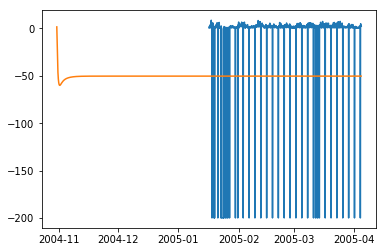

PT08.S1(CO)


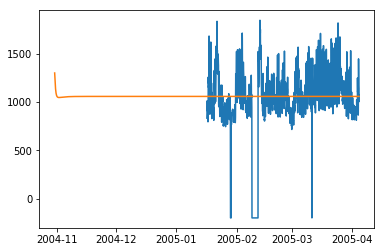

NMHC(GT)


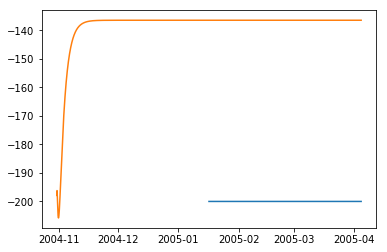

C6H6(GT)


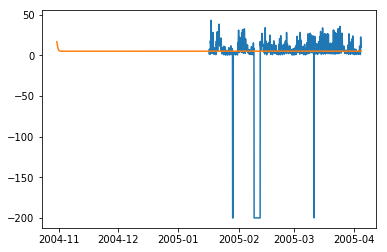

PT08.S2(NMHC)


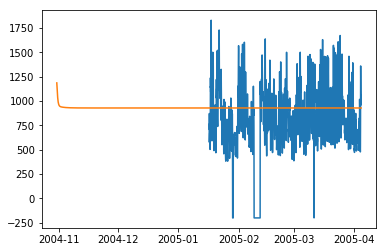

NOx(GT)


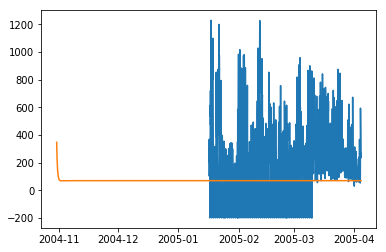

PT08.S3(NOx)


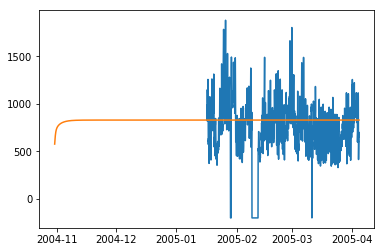

NO2(GT)


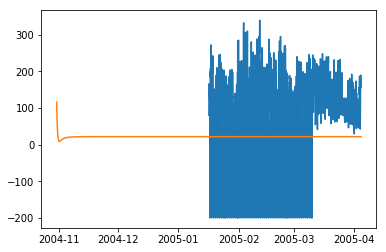

PT08.S4(NO2)


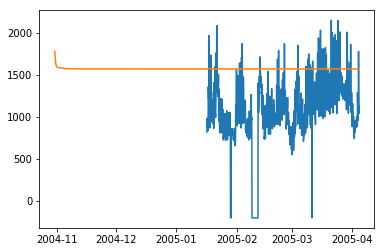

PT08.S5(O3)


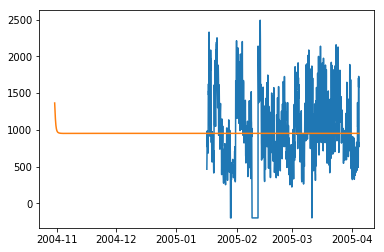

T


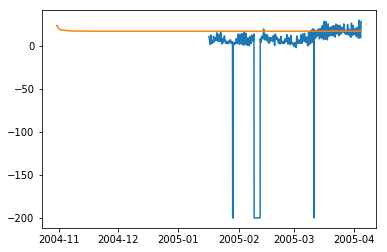

RH


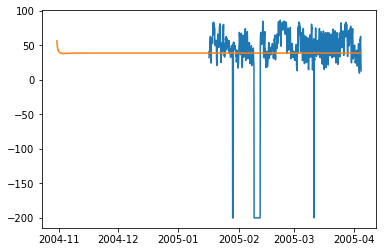

AH


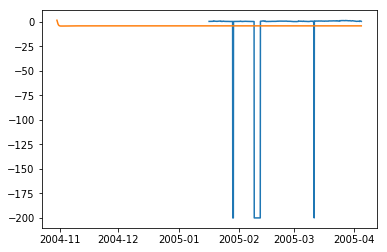

In [231]:
for col in airqualitydata.columns:
    print(col)
    plt.plot(test_data[col])
    plt.plot(df[col])
    plt.show()